In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

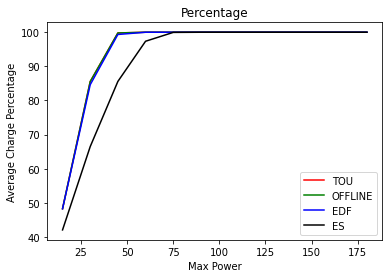

In [17]:
# Typical Charger draws around 7.5 KW
sample_step = 15
max_power = int(180)
num_of_samples = int(180 / sample_step)

num_vehicle_ub = 100000
num_vehicle_lb = 40

tou_df = np.zeros(num_of_samples,dtype=object)
edf_df = np.zeros(num_of_samples,dtype=object)
es_df = np.zeros(num_of_samples,dtype=object)
offline_df = np.zeros(num_of_samples,dtype=object)
tou_percent_mean = np.zeros(num_of_samples,dtype=object)
offline_percent_mean = np.zeros(num_of_samples,dtype=object)
edf_percent_mean = np.zeros(num_of_samples,dtype=object)
es_percent_mean = np.zeros(num_of_samples,dtype=object)
tou_emission_mean = np.zeros(num_of_samples,dtype=object)
edf_emission_mean = np.zeros(num_of_samples,dtype=object)
es_emission_mean = np.zeros(num_of_samples,dtype=object)
offline_emission_mean = np.zeros(num_of_samples,dtype=object)

power = np.arange(sample_step, max_power+1, sample_step, dtype=int)

for i in range(1,num_of_samples+1,1):
    tou_df[i-1] = pd.read_csv('gurobisolver/TOU_P{}.0.csv'.format(i*sample_step))
    edf_df[i-1] = pd.read_csv('EDF_P{}.csv'.format(i*sample_step))
    es_df[i-1] = pd.read_csv('ES_P{}.csv'.format(i*sample_step))
    offline_df[i-1] = pd.read_csv('gurobisolver/offline_P{}.csv'.format(i*sample_step))
    df = tou_df[i-1]
    df2 = offline_df[i-1]
    df3 = edf_df[i-1]
    df4 = es_df[i-1]

    tou_percent_mean[i-1] = df[(df.num_vehicle < num_vehicle_ub) & 
                               (df.num_vehicle > num_vehicle_lb)].percents.mean()
    tou_emission_mean[i-1] = df[(df.num_vehicle < num_vehicle_ub) & 
                                (df.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    offline_percent_mean[i-1] = df2[(df2.num_vehicle < num_vehicle_ub) & 
                               (df2.num_vehicle > num_vehicle_lb)].percents.mean()
    offline_emission_mean[i-1] = df2[(df2.num_vehicle < num_vehicle_ub) & 
                                (df2.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    edf_percent_mean[i-1] = df3[(df3.num_vehicle < num_vehicle_ub) & 
                               (df3.num_vehicle > num_vehicle_lb)].percents.mean()
    edf_emission_mean[i-1] = df3[(df3.num_vehicle < num_vehicle_ub) & 
                                (df3.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    es_percent_mean[i-1] = df4[(df4.num_vehicle < num_vehicle_ub) & 
                               (df4.num_vehicle > num_vehicle_lb)].percents.mean()
    es_emission_mean[i-1] = df4[(df4.num_vehicle < num_vehicle_ub) & 
                                (df4.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
#print(df)
#print(df2)
    
plt.plot(power,tou_percent_mean, color='r', label='TOU')
plt.plot(power,offline_percent_mean, color='g', label='OFFLINE')
plt.plot(power,edf_percent_mean, color='b', label='EDF')
plt.plot(power,es_percent_mean, color='k', label='ES')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Max Power")
plt.ylabel("Average Charge Percentage")
plt.title("Percentage")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
plt.plot(power,tou_emission_mean, color='r', label='TOU')
plt.plot(power,offline_emission_mean, color='g', label='OFFLINE')
plt.plot(power,edf_emission_mean, color='b', label='EDF')
plt.plot(power,es_emission_mean, color='k', label='ES')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Max Power")
plt.ylabel("Average Charge Percentage")
plt.title("Percentage")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

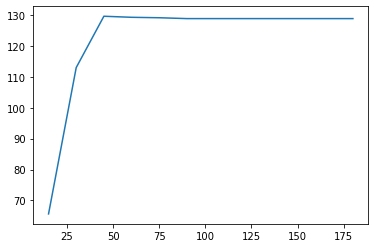

In [120]:
plt.plot(power,tou_emission_mean)

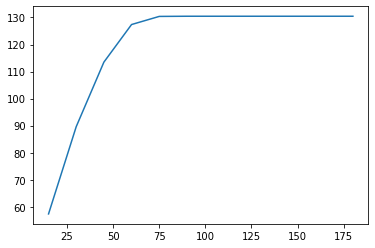

In [6]:
plt.plot(power,edf_emission_mean)

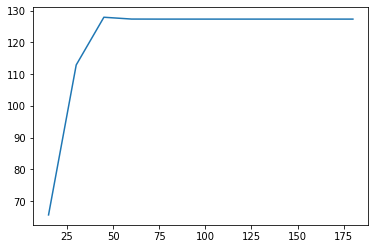

In [7]:
plt.plot(power,offline_emission_mean)

In [8]:
print(offline_emission_mean)

[65.60148882610177 112.87312341457549 127.91496886500481 127.3415692372993
 127.32731168719091 127.32718987882518 127.32718987882518
 127.32718987882518 127.32718987882518 127.32718987882518
 127.32718987882518 127.32718987882518]


In [9]:
print(tou_emission_mean)

[65.61759787176014 113.01600976758145 129.6432156747917 129.3019755515543
 129.15737680193976 128.8797904182101 128.8797904182101 128.8797904182101
 128.8797904182101 128.8797904182101 128.8797904182101 128.8797904182101]


In [10]:
print(edf_emission_mean)

[57.37043698516424 89.62104818782305 113.47900001474805 127.38458341426012
 130.38369221601812 130.4480871464572 130.4480871464572 130.4480871464572
 130.4480871464572 130.4480871464572 130.4480871464572 130.4480871464572]
